In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
import pickle as pkl

In [101]:
#preprocess before metric collection
Tt=79
N=199
y_true=np.zeros(N*Tt)
y_ffc=np.zeros(N*Tt)
y_afo=np.zeros(N*Tt)
y_suresh=np.zeros(N*Tt)
y_sens=np.zeros(N*Tt)
plot=0

nn=N
for n in range(nn):
    with open('../examples/simulation/results_'+str(n)+'.pkl','rb') as f:
        arr = pkl.load(f)
    y_true[n*Tt:(n+1)*Tt] = arr['gt'][1:]
    y_ffc[n*Tt:(n+1)*Tt] = arr['FFC'][0,:]
    y_afo[n*Tt:(n+1)*Tt] = arr['AFO'][0,:]
    y_suresh[n*Tt:(n+1)*Tt] = arr['Suresh_et_al'][0,:]
    y_sens[n*Tt:(n+1)*Tt] = arr['Sens'][0,1:]
    

    
    if np.max(y_true[n*Tt:(n+1)*Tt]==1) and plot:
        print('positive')
        plt.figure()
        plt.plot(y_true[n*Tt:(n+1)*Tt],label='true')
        plt.plot(y_ffc[n*Tt:(n+1)*Tt],label='ffc')
        #plt.plot(y_afo[n*Tt:(n+1)*Tt])
        #plt.plot(y_suresh[n*Tt:(n+1)*Tt])
        plt.plot(y_sens[n*Tt:(n+1)*Tt],label='sens')
        plt.legend()
        
#print metrics
auc_ffc= metrics.roc_auc_score(y_true, y_ffc)
auc_afo= metrics.roc_auc_score(y_true, y_afo)
auc_suresh= metrics.roc_auc_score(y_true, y_suresh)
auc_sens= metrics.roc_auc_score(y_true, y_sens)
    
'''
# recall/sensitivity
report_ffc = metrics.classification_report(y_true, y_ffc)
report_afo = metrics.classification_report(y_true, y_afo)
report_suresh = metrics.classification_report(y_true, y_suresh)
report_sens = metrics.classification_report(y_true, y_sens)
'''
    
# auprc
auprc_ffc= metrics.average_precision_score(y_true, y_ffc)
auprc_afo= metrics.average_precision_score(y_true, y_afo)
auprc_suresh= metrics.average_precision_score(y_true, y_suresh)
auprc_sens= metrics.average_precision_score(y_true, y_sens)

'''
print('FFC - AUC: ',auc_ffc, ' Sensitivity: ',report_ffc['recall'], ' AUPRC: ',  auprc_ffc)
print('AFO - AUC: ',auc_afo, ' Sensitivity: ',report_afo['recall'], ' AUPRC: ',  auprc_afo)
print('Suresh - AUC: ',auc_suresh, ' Sensitivity: ',report_suresh['recall'], ' AUPRC: ',  auprc_suresh)
print('Sens - AUC: ',auc_sens, ' Sensitivity: ',report_sens['recall'], ' AUPRC: ',  auprc_sens)
'''

print('FFC & ', round(auc_ffc,4),  ' & ',  round(auprc_ffc,4) , '\\\\')
print('AFO &',round(auc_afo,4),  ' & ',  round(auprc_afo,4), '\\\\')
print('Suresh & ',round(auc_suresh,4),  ' & ',  round(auprc_suresh,4), '\\\\')
print('Sens & ',round(auc_sens,4),  ' & ',  round(auprc_sens,4), '\\\\')

FFC &  0.9795  &  0.5884 \\
AFO & 0.9301  &  0.3984 \\
Suresh &  0.3873  &  0.0757 \\
Sens &  0.521  &  0.0051 \\


In [60]:
with open('./data/simulated_data/gt_test.pkl','rb') as f:
    gt_arr = pkl.load(f)

(array([7.092e+03, 6.000e+00, 4.000e+00, 1.000e+00, 3.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 2.000e+00]),
 array([6.55651092e-08, 5.22901759e-02, 1.04580286e-01, 1.56870396e-01,
        2.09160507e-01, 2.61450617e-01, 3.13740727e-01, 3.66030838e-01,
        4.18320948e-01, 4.70611058e-01, 5.22901168e-01]),
 <a list of 10 Patch objects>)

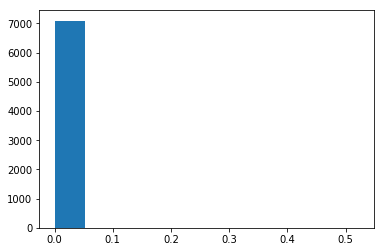

In [90]:
plt.hist(y_ffc)